## SVM CLASSFICATION

In [1]:
# Import all libraries
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [6]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [7]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


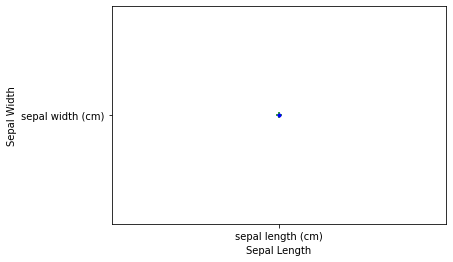

In [9]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(x=['sepal length (cm)'], y=['sepal width (cm)'],color="green",marker='+')
plt.scatter(x=['sepal length (cm)'], y=['sepal width (cm)'],color="blue",marker='.')

In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## SVM 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['flower_name','target'],axis='columns')
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
len(X_train)

120

In [15]:
len(X_test)

30

In [21]:
from sklearn.svm import SVC
model = SVC()

In [22]:
model.fit(X_train,y_train)

SVC()

In [23]:
model.score(X_test,y_test)

0.9666666666666667

In [24]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

## TUNNING PARAMETER 

### 1)REGULARIZATION

In [25]:
model_C = SVC(C=1)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

0.9666666666666667

In [26]:
model_C = SVC(C=10)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

1.0

### 2)GAMMA 

In [27]:
model_g = SVC(gamma=1)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9666666666666667

In [28]:
model_g = SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

1.0

In [29]:
model_g = SVC(gamma=1,C=1)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9666666666666667

In [30]:
model_g = SVC(C=10,gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

1.0

### 3)KERNEL 

In [31]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train,y_train) 
model_linear_kernel.score(X_test,y_test) 

1.0

In [32]:
model_linear_kernel = SVC(kernel='rbf')
model_linear_kernel.fit(X_train,y_train) 
model_linear_kernel.score(X_test,y_test) 

0.9666666666666667

In [33]:
model_linear_kernel = SVC(kernel='sigmoid')
model_linear_kernel.fit(X_train,y_train) 
model_linear_kernel.score(X_test,y_test) 

0.3

In [34]:
model_linear_kernel = SVC(kernel='poly')
model_linear_kernel.fit(X_train,y_train) 
model_linear_kernel.score(X_test,y_test) 

0.9666666666666667